# Classification Modeling

In [180]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

## Load Data

In [306]:
df = pd.read_csv('data/train.csv')

X = df.drop('label', axis=1)
y = df.label

df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Preprocessing
Create greyscale and binary image representations and split into training and testing sets


In [307]:
# Create a dataset with grayscale image data and another with binary (black and white) image data

X_greyscale = (X - X.mean()) / (X.max() - X.min()) # Normalize greyscale data

X_greyscale = X_greyscale.fillna(0)


convert_binary = lambda x: 1 if x > 0 else 0
X_binary = X.applymap(convert_binary)

X_gs_train, X_gs_test, y_gs_train, y_gs_test = train_test_split(X_greyscale, y, test_size=.25, random_state=1)
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y, test_size=.25, random_state=1)

In [232]:
X_greyscale.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.468577e-17,-1.148260e-17,-1.476015e-17,-8.881216e-19,3.204056e-17,8.732572e-18,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.485390e-02,1.824338e-02,1.294264e-02,6.956008e-03,7.458652e-03,6.681683e-03,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-8.633296e-04,-4.610049e-04,-2.332957e-04,-7.980425e-05,-6.786652e-05,-4.608295e-05,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-8.633296e-04,-4.610049e-04,-2.332957e-04,-7.980425e-05,-6.786652e-05,-4.608295e-05,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-8.633296e-04,-4.610049e-04,-2.332957e-04,-7.980425e-05,-6.786652e-05,-4.608295e-05,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-8.633296e-04,-4.610049e-04,-2.332957e-04,-7.980425e-05,-6.786652e-05,-4.608295e-05,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.991367e-01,9.995390e-01,9.997667e-01,9.999202e-01,9.999321e-01,9.999539e-01,0.0,0.0,0.0,0.0


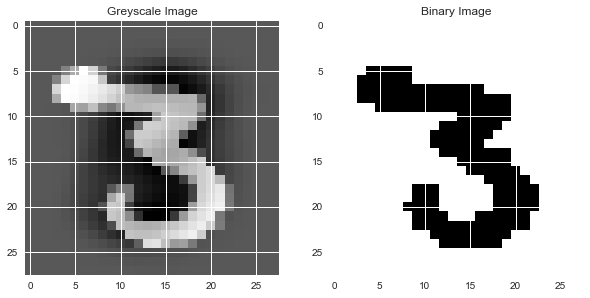

In [233]:
# Plot visualiztion of the different representations

plt.figure(figsize=(10, 6))

plt.figure(1)

plt.subplot(121)
image_greyscale = X_greyscale.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_greyscale, cmap='gray')
plt.title('Greyscale Image')

plt.subplot(122)
image_binary = X_binary.iloc[13].as_matrix().reshape((28,28))
plt.imshow(image_binary, cmap='binary')
plt.title('Binary Image')

## Baseline Models
Train and validate baseline models suing subset of training data 

In [310]:
# Use some basic models

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Use some ensemble methods, for this useit's okay if our model is a black box

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

baseline_models = [SVC, KNeighborsClassifier, GaussianNB, DecisionTreeClassifier, 
                   RandomForestClassifier, AdaBoostClassifier]
baseline_models_str = ['SVC', 'KNN', 'GaussianNB', 'Decision Tree', 
                   'Random Forest', 'Ada Boost']
baseline_scores_greyscale = []
baseline_scores_binary = []

for m in baseline_models:
    baseline_scores_greyscale.append(np.mean(cross_val_score(m(), X_gs_train[:5000], y_gs_train[:5000])))
    
for m in baseline_models:
    baseline_scores_binary.append(np.mean(cross_val_score(m(), X_binary_train[:5000], y_binary_train[:5000])))

In [311]:
baseline_df = pd.DataFrame()
baseline_df['model'] = pd.Series(baseline_models_str*2)
baseline_df['score'] = pd.Series(baseline_scores_greyscale + baseline_scores_binary)
baseline_df['kind'] = pd.Series(['Greyscale']*len(baseline_models) + ['Binary']*len(baseline_models))

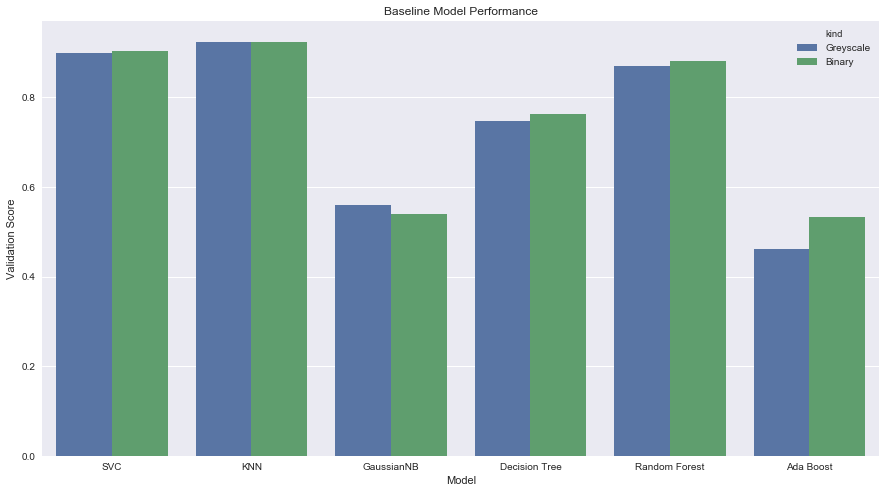

SVC ( Greyscale ): 0.8985976834983874
KNN ( Greyscale ): 0.9238022193953906
GaussianNB ( Greyscale ): 0.5600041665032095
Decision Tree ( Greyscale ): 0.7468093261221379
Random Forest ( Greyscale ): 0.8691997253056559
Ada Boost ( Greyscale ): 0.46067147401425085
SVC ( Binary ): 0.9034015407900772
KNN ( Binary ): 0.924595954004734
GaussianNB ( Binary ): 0.5402006027435652
Decision Tree ( Binary ): 0.7632029986554237
Random Forest ( Binary ): 0.881596824412234
Ada Boost ( Binary ): 0.5330723721338785


In [314]:
plt.figure(figsize=(15, 8))

ax = sns.barplot(x='model', y='score', hue='kind', data = baseline_df)
ax.set(title='Baseline Model Performance', xlabel='Model', ylabel="Validation Score")
plt.show()

models = baseline_df.model.tolist()
scores = baseline_df.score.tolist()
kinds = baseline_df.kind.tolist()
for model, kind, score in zip(models, kinds, scores):
    print(model, '(', kind, '):', score)

Validation scores are generally higher when using the binary representation of the images as opposed to the greyscale representation. The only model that scores lower is the Naive Bayes model, which makes sense since it's the only generative one in this set and greyscale values allow it to better emulate the natural distribution of a given digit.

## Model Tuning
Tune hyperparameters of best models (SVC and KNN) using simple cross-validation and then a full grid search

### SVM

In [64]:
# Build linear SVC
svc_linear = SVC(kernel='linear')

# Perform cross-validation to find optimal C value
scores_linear = []
params_linear = np.logspace(-6, 6, 20)
for x in params_linear:
    svc_linear.C = x
    scores = cross_val_score(svc_linear, X_binary_train[:1000], y_binary_train[:1000], cv=5)
    scores_linear.append(1 - np.mean(scores))

index_linear = scores_linear.index(min(scores_linear))
C_linear = params_linear[index_linear]

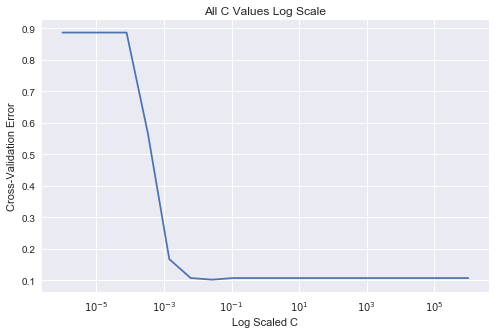

Optimal C:  0.0263665089873


In [65]:
# Plot cross-validation error

plt.figure(figsize=(8, 5))

plt.plot(params_linear, scores_linear)
plt.xlabel('Log Scaled C')
plt.ylabel('Cross-Validation Error')
plt.xscale('log')
plt.show()
print('Optimal C: ', C_linear)

In [66]:
svc_tuned = SVC(kernel='linear', C=C_linear)
svc_tuned.fit(X_binary_train, y_binary_train)
svc_predict = svc_tuned.predict(X_binary_test)
svc_accuracy = accuracy_score(y_binary_test, svc_predict)
print('Tuned SVM Accuracy: ', svc_accuracy)

Tuned SVM Accuracy:  0.938


93.8% is a decent improvement from our untuned SVM model. Let's do a full grid search, checking different kernels, to see if we can get an even higher score.

In [ ]:
parameter_candidates = [
  {'C': [.001, .01, 1, 10, 100], 'kernel': ['linear']},
  {'C': [.001, .01, 1, 10, 100], 'gamma': [.01, .001, 0.0001], 'kernel': ['rbf']},
  {'C': [.001, .01, 1, 10, 100], 'degree': [1, 2, 3, 4], 'kernel': ['poly']}
]

clf_svm = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

clf_svm.fit(X_binary_train[:5000], y_binary_train[:5000]);   

In [ ]:
print('SVM accuracy with GridSearchCV: ',clf_svm.best_score_)
clf_svm.best_estimator_

The grid search found that a Gaussian SVM best fits the data and produced a tuned model with a validation score of 95.22%. Decent result for a simple tuned model.

### KNN

In [335]:
parameter_candidates = [
  {'n_neighbors': [1,3,5,7,9,11,13,15], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']}
]
                                            

clf_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameter_candidates, n_jobs=-1)

clf_knn.fit(X_binary_train[:5000], y_binary_train[:5000]);   

In [336]:
print('KNN accuracy with GridSearchCV: ',clf_knn.best_score_)
clf_.best_estimator_

KNN accuracy with GridSearchCV:  0.9318


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

### Random Forest

In [ ]:
parameter_candidates = [
  {'n_estimators': [10, 100, 500, 1000, 5000, 10000], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 3, 4],
  'criterion': ['gini', 'entropy']},
]

clf_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameter_candidates, n_jobs=-1)

clf_rf.fit(X_binary_train[:5000], y_binary_train[:5000]);   

In [ ]:
print('Random Forest score with GridSearchCV: ', clf_rf.best_score_)
clf_rf.best_estimator_

We're getting a decent boost in performance when we try to tune our random forest classifier, but there's no significant difference between only tuning one hyperparameter and tuning four. This makes sense since it's an ensemble method and acts more like a "black box" that we can't interact with too easily. 

After tuning a Gaussian SVM has show to have the best validation performace. Let's test its accuracy by training it on our full training set and testing it against our full testing set.

In [74]:
svm = clf_svm.best_estimator_
svm.fit(X_binary_train, y_binary_train)
prediction_svm = svm.predict(X_binary_test)
accuracy_svm = accuracy_score(y_binary_test, prediction_svm)
print(accuracy_svm)

0.97780952381


Our tuned Support Vector Classifier has an accuracy of 97.78%. This is great for a relativley simple discriminative model. But I think we can do better here. I'm going to try using deep learning achieve a higher level of accuracy.

## Deep Learning

In [299]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend
backend.set_image_dim_ordering('th')

### Preprocessing
Process greyscale and binary image data for use with simple neural networks and convolutional neural networks

In [290]:
# Convert data to NumPy matrix form
X_gs_train = X_gs_train.as_matrix()
X_gs_test = X_gs_test.as_matrix()

X_binary_train = X_binary_train.as_matrix()
X_binary_test = X_binary_test.as_matrix()

# Convert predictor data to work with CNN
X_gs_cnn_train = X_gs_train.reshape(X_gs_train.shape[0], 1, 28, 28).astype('float32')
X_gs_cnn_test = X_gs_test.reshape(X_gs_test.shape[0], 1, 28, 28).astype('float32')

X_binary_cnn_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_binary_cnn_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Convert target data categories to binary representation (one-hot encode)
y_gs_train = np_utils.to_categorical(y_gs_train)
y_gs_test = np_utils.to_categorical(y_gs_test)

y_binary_train = np_utils.to_categorical(y_binary_train)
y_binary_test = np_utils.to_categorical(y_binary_test)

### Simple Neural Network
Simple model with one hidden layer. Train using both greyscale and binary data to see which performs better.

In [266]:
def basicNN():
    model = Sequential()
    model.add(Dense(784, input_dim=784, init='normal', activation='relu'))
    model.add(Dense(10, init='normal', activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [268]:
# Build and complile basic models
basic_nn_greyscale = basicNN()
basic_nn_binary = basicNN()

# Train basic models
basic_nn_greyscale.fit(X_gs_train, y_gs_train, nb_epoch=10, batch_size=200, verbose=2)
basic_nn_binary.fit(X_binary_train, y_binary_train, nb_epoch=10, batch_size=200, verbose=2)

# Test basic model
greyscale_results = basic_nn_greyscale.evaluate(X_gs_test, y_gs_test, verbose=0)
binary_results = basic_nn_binary.evaluate(X_binary_test, y_binary_test, verbose=0)
print('')
print('Greyscale accuracy: ', greyscale_results[1])
print('Binary accuracy: ', binary_results[1])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
6s - loss: 0.3319 - acc: 0.9064
Epoch 2/10
5s - loss: 0.1209 - acc: 0.9657
Epoch 3/10
5s - loss: 0.0768 - acc: 0.9788
Epoch 4/10
5s - loss: 0.0511 - acc: 0.9866
Epoch 5/10
5s - loss: 0.0336 - acc: 0.9925
Epoch 6/10
5s - loss: 0.0226 - acc: 0.9959
Epoch 7/10
5s - loss: 0.0158 - acc: 0.9975
Epoch 8/10
5s - loss: 0.0109 - acc: 0.9988
Epoch 9/10
5s - loss: 0.0073 - acc: 0.9996
Epoch 10/10
5s - loss: 0.0056 - acc: 0.9995
Epoch 1/10
6s - loss: 0.3540 - acc: 0.8955
Epoch 2/10
5s - loss: 0.1601 - acc: 0.9511
Epoch 3/10
5s - loss: 0.1067 - acc: 0.9692
Epoch 4/10
5s - loss: 0.0776 - acc: 0.9777
Epoch 5/10
5s - loss: 0.0578 - acc: 0.9839
Epoch 6/10
5s - loss: 0.0438 - acc: 0.9880
Epoch 7/10
5s - loss: 0.0312 - acc: 0.9923
Epoch 8/10
5s - loss: 0.0244 - acc: 0.9943
Epoch 9/10
5s - loss: 0.0177 - acc: 0.9967
Epoch 10/10
5s - loss: 0.0124 - acc: 0.9980

Greyscale accuracy:  0.97780952381
Binary accuracy:  0.973714285714


The neural network's accuracy is better using greyscale data. Also, the accuracy using greyscale data is better than our tuned SVM while the accuracy using binary data isn't. From here we'll use greyscale with a convolutional neural networks.

### Convolutional Neural Network

In [303]:
# Instantiate CNN
model = Sequential()

# Build layers
model.add(Convolution2D(32, 5, 5, border_mode='same', input_shape=(1, 28, 28)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile CNN
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(1, 28, 28..., padding="valid")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5))`


In [304]:
# Train CNN
model.fit(X_gs_cnn_train, y_gs_train, nb_epoch=15, batch_size=128, verbose=2)

# Test CNN
cnn_results = model.evaluate(X_gs_cnn_test, y_gs_test, verbose=0)
print('')
print('CNN accuracy: ', cnn_results[1])

C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
145s - loss: 0.3872 - acc: 0.8809
Epoch 2/10
142s - loss: 0.1062 - acc: 0.9666
Epoch 3/10
139s - loss: 0.0744 - acc: 0.9761
Epoch 4/10
140s - loss: 0.0615 - acc: 0.9811
Epoch 5/10
139s - loss: 0.0531 - acc: 0.9831
Epoch 6/10
142s - loss: 0.0444 - acc: 0.9852
Epoch 7/10
139s - loss: 0.0405 - acc: 0.9867
Epoch 8/10
137s - loss: 0.0366 - acc: 0.9882
Epoch 9/10
137s - loss: 0.0334 - acc: 0.9895
Epoch 10/10
149s - loss: 0.0309 - acc: 0.9899
